## EGA SULFIKA_2009106011

## Import Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

## Melihat Dataset

In [2]:
df = pd.read_csv("Postest4.csv")

df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,0,1
0,32894,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic,0.0,1.0
1,46652,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic,0.0,1.0
2,30097,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic,1.0,0.0
3,62177,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic,1.0,0.0
4,24907,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic,1.0,0.0


In [3]:
#mengecek data dengan nilai null 
df.isna().sum()

instance_id         0
artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
obtained_date       0
valence             0
music_genre         0
0                   4
1                   4
dtype: int64

## DATA SPLIT

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50001 non-null  int64  
 1   artist_name       50001 non-null  object 
 2   track_name        50001 non-null  object 
 3   popularity        50001 non-null  float64
 4   acousticness      50001 non-null  float64
 5   danceability      50001 non-null  float64
 6   duration_ms       50001 non-null  float64
 7   energy            50001 non-null  float64
 8   instrumentalness  50001 non-null  float64
 9   key               50001 non-null  object 
 10  liveness          50001 non-null  float64
 11  loudness          50001 non-null  float64
 12  mode              50001 non-null  object 
 13  speechiness       50001 non-null  float64
 14  tempo             50001 non-null  object 
 15  obtained_date     50001 non-null  object 
 16  valence           50001 non-null  float6

In [6]:
X = df[['popularity','acousticness','danceability','duration_ms','energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']]
y = df[['music_genre']]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

## DATA NORMALISASI

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
standardScaler = StandardScaler()
X_train_std = standardScaler.fit_transform(X_train)
X_test_std = standardScaler.transform(X_test)

## ALGORITMA KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
Knn = KNeighborsClassifier()
Knn.fit(X_train_std,y_train)

knn_pred = Knn.predict(X_test_std)
akurasi_KNN = accuracy_score(y_test, knn_pred)

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [14]:
print("Akurasi dari algoritma KNN :", round(akurasi_KNN,2))

Akurasi dari algoritma KNN : 0.49


## ALGORITMA SVM

In [24]:
from sklearn.svm import SVC

In [25]:
svm = SVC()
svm.fit(X_train_std,y_train)

svm_pred = svm.predict(X_test_std)
akurasi_svm = accuracy_score(y_test, svm_pred)

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
print("Akurasi algoritma SVC :", round(akurasi_svm,2))

Akurasi algoritma SVC : 0.57


## PERBANDINGAN AKURASI SETIAP ALGORITMA

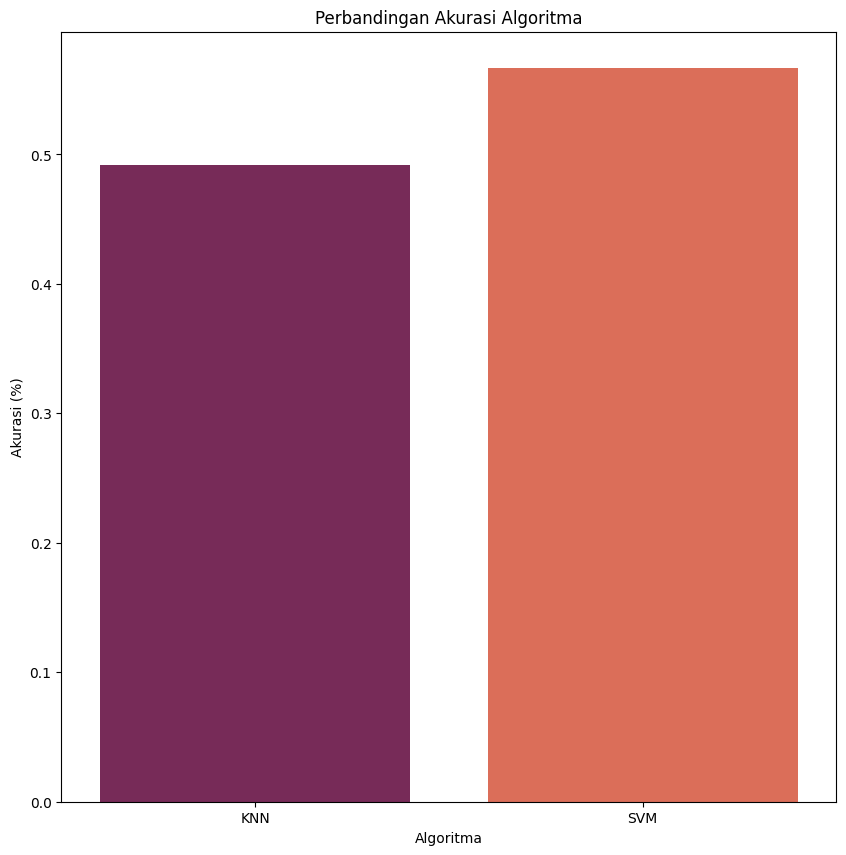

In [33]:
algoritma = ["KNN","SVM"]
akurasi = [akurasi_KNN,akurasi_svm]

plt.figure(figsize=(10,10))

sns.barplot(x= algoritma,y = akurasi,palette='rocket')

plt.title("Perbandingan Akurasi Algoritma")
plt.ylabel("Akurasi (%)")
plt.xlabel("Algoritma")
plt.show()

## HYPERPARAMETER TUNING (Algoritma KNN)

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
modelKNN = KNeighborsClassifier()

param_grid = { "n_neighbors" :[i for i in range(0,5)]}

gsv = GridSearchCV(estimator=modelKNN, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gsv.fit(X_train, y_train)

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py", line 207, in fit
    return self._fit(X, y)
  File "C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\nei

In [36]:
# mencari parameter terbaik
print(gs.best_params_)

{'n_neighbors': 1}


In [37]:
print("Akurasi Training Set : ",round(gs.score(X_train,y_train)*100,1),"%")

Akurasi Training Set :  97.2 %
